In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

df = pd.read_csv('data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index(pd.DatetimeIndex(df['timestamp']))
df = df[df['timestamp'] >= pd.Timestamp('2020/08/30')]
df = df[df['timestamp'] <= pd.Timestamp('2020/10/03')]
df = df[df['obj_score'] <= 39]
df = df[df['obj_score'] >= 33.5]
df['obj_score'] = df['obj_score'] + 0.1

print(df['timestamp'])
print(df.index)

def density_scatter( x , y, ax = None, sort = True, bins = 15, **kwargs )   :

    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True)
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    z[np.where(np.isnan(z))] = 0.0

    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, s=2.5, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    #cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    #cbar.ax.set_ylabel('Density')

    return ax
    

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


timestamp
2020-08-30 02:11:45   2020-08-30 02:11:45
2020-08-30 02:11:49   2020-08-30 02:11:49
2020-08-30 03:13:51   2020-08-30 03:13:51
2020-08-30 03:14:37   2020-08-30 03:14:37
2020-08-30 03:18:46   2020-08-30 03:18:46
                              ...        
2020-09-17 00:03:24   2020-09-17 00:03:24
2020-09-17 00:03:28   2020-09-17 00:03:28
2020-09-17 00:03:37   2020-09-17 00:03:37
2020-09-17 00:03:41   2020-09-17 00:03:41
2020-09-17 00:04:00   2020-09-17 00:04:00
Name: timestamp, Length: 18024, dtype: datetime64[ns]
DatetimeIndex(['2020-08-30 02:11:45', '2020-08-30 02:11:49',
               '2020-08-30 03:13:51', '2020-08-30 03:14:37',
               '2020-08-30 03:18:46', '2020-08-30 03:48:53',
               '2020-08-30 03:51:41', '2020-08-30 04:06:30',
               '2020-08-30 04:15:51', '2020-08-30 06:35:42',
               ...
               '2020-09-17 00:02:48', '2020-09-17 00:02:51',
               '2020-09-17 00:02:59', '2020-09-17 00:03:11',
               '2020-09-17 0

18024
avg 35.48970705725696 std 0.7968014086232654
Personal mean 0.5399536070654667, personal std 0.28353610275827074
Location A
len 3891 avg 35.65085582112555 std 0.8806016070057403
Personal mean 0.7603121732555201, personal std 0.2420307530756205
Location B
Personal mean 0.6721088338510759, personal std nan
len 5204 avg 35.394652190622644 std 0.6721088338510784
Location C
Personal mean 0.38876114038607124, personal std 0.24074302566462574
len 2508 avg 35.19165869218487 std 0.6854905451799587
112


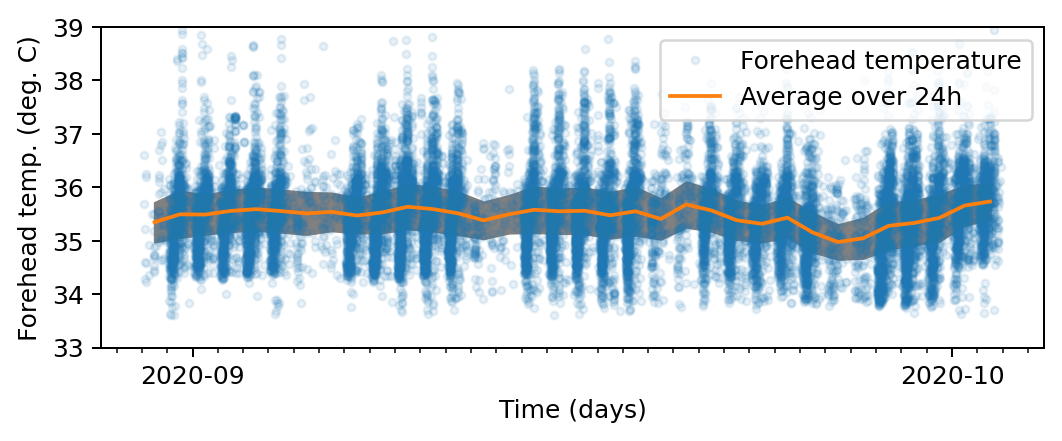

In [5]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
plt.plot(df['timestamp'], df['obj_score'],'.', alpha=0.1, label='Forehead temperature')
df_mean = df.resample('D').apply({'obj_score':'mean'})
df_std = df.resample('D').apply({'obj_score':'std'})

plt.plot(df_mean.index+pd.Timedelta('0.5 day'), df_mean['obj_score'], label='Average over 24h')

plt.fill_between(df_mean.index+pd.Timedelta('0.5 day'), df_mean['obj_score'] - df_std['obj_score']/2, df_mean['obj_score'] + df_std['obj_score']/2,
                 color='gray', alpha=1.0)

# Set title and labels for axes
ax.set(       ylabel="Forehead temp. (deg. C)", xlabel="Time (days)")

# Rotate tick marks on x-axis
#plt.setp(ax.get_xticklabels(), rotation=0)
frame1 = plt.gca()
#frame1.axes.xaxis.set_ticks([])
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
print(len(df))
print("avg {} std {}".format(df['obj_score'].mean(), df['obj_score'].std()))
fig.subplots_adjust(bottom=0.2)
mean_raw = df['obj_score'].mean()
plt.tight_layout()
ax.set_ylim(33,39)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month

years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)


# format the coords message box
#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
#fig.autofmt_xdate()


plt.savefig('all_data.png')

groups = df.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))


print("Location A")
df_filtered = df[df['machine_id'].isin([4428])]
print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))

print("Location B")
df_filtered = df[df['machine_id'].isin([2952,3075,3690,3813,3936,4059,4182,4305])]

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))

print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))
print("Location C")
df_filtered = df[df['machine_id'].isin([6396])]

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))
print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))


more_than_37 = df['obj_score']
print(len(more_than_37[more_than_37 > more_than_37.mean() + 3*more_than_37.std()]))

df_filtered_notouch = df[df['meteo_realtemp'] > 0]
df_filtered_notouch = df_filtered_notouch[df_filtered_notouch['machine_id'].isin([3075, 3936, 4059, 5781, 4428, 5535, 7134, 2706, 5904, 6396])]



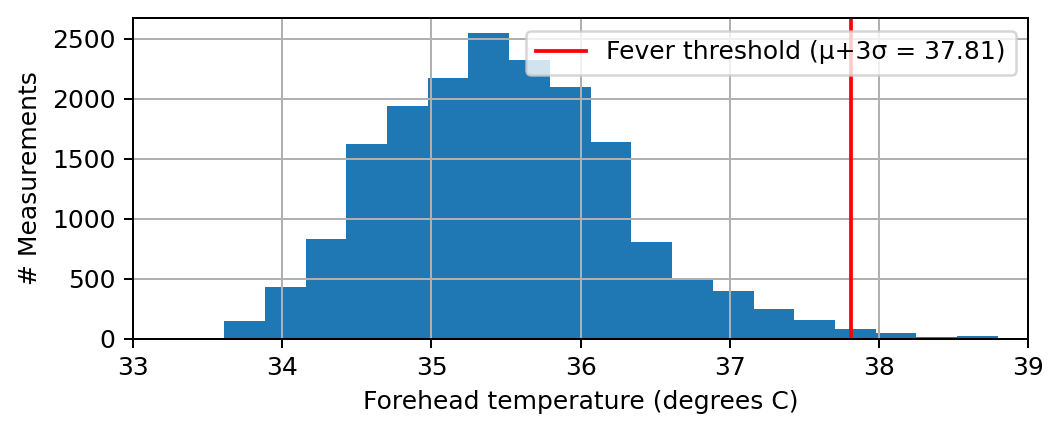

In [6]:
plt.rcParams["figure.dpi"] = 180
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df.hist(column=['obj_score'], bins=20, figsize=(6, 3), ax = plt.gca())
ax.set(      ylabel="# Measurements", xlabel="Forehead temperature (degrees C)")
ax.set_title("")
ax.set_xlim(33,39)
# x coordinates for the lines
xcoords = [37.81]
# colors for the lines
colors = ['r']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='Fever threshold (μ+3σ = {})'.format(xc), c=c)
fig.subplots_adjust(bottom=0.2) 
plt.legend()
plt.tight_layout()

plt.savefig('hist_all.png')


R2 =  0.19005961095788249
10295
51


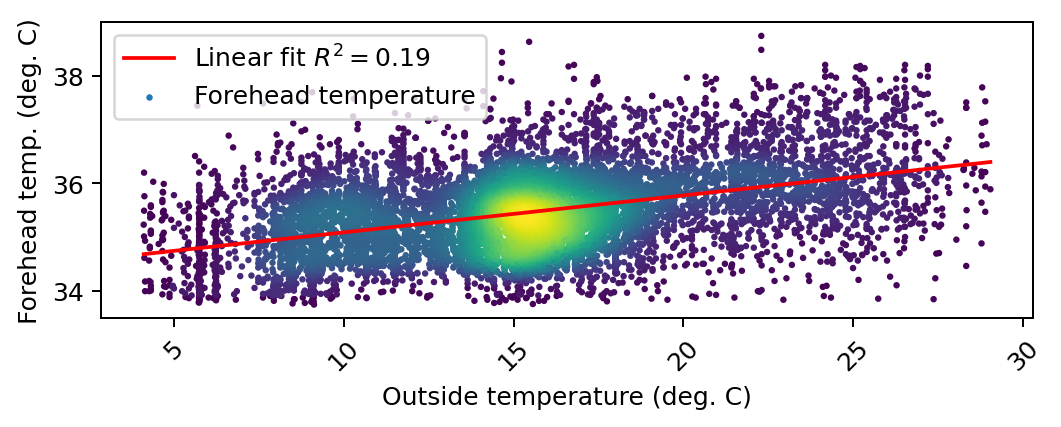

In [7]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_outside = df[df['meteo_realtemp'] > 0]
df_outside = df_outside[df_outside['machine_id'].isin([3075, 3936, 4059, 5781, 4428, 5535, 7134, 2706, 5904, 6396])] 

linear_regressor = LinearRegression()
linear_regressor.fit(df_outside['meteo_realtemp'].values.reshape(-1, 1), df_outside['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_outside['meteo_realtemp'].min(), df_outside['meteo_realtemp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_outside['meteo_realtemp'].values.reshape(-1, 1), df_outside['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)


ax.set(xlabel="Outside temperature (deg. C)",
       ylabel="Forehead temp. (deg. C)")

density_scatter(df_outside['meteo_realtemp'], df_outside['obj_score'], ax=ax,label='Forehead temperature')
plt.plot(X, Y_pred, 'red', label=r'Linear fit $R^2={:.2f}$'.format(score_r2))

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
print(len(df_outside))
#plt.title("Effect of outside temperature on forehead temperature")
more_than_37 = df_outside['obj_score']

print(len(more_than_37[more_than_37 > more_than_37.mean() + 3*more_than_37.std()]))
plt.tight_layout()

plt.savefig('outside_forehead.png')

R2 =  0.19005961095788249
10295
356


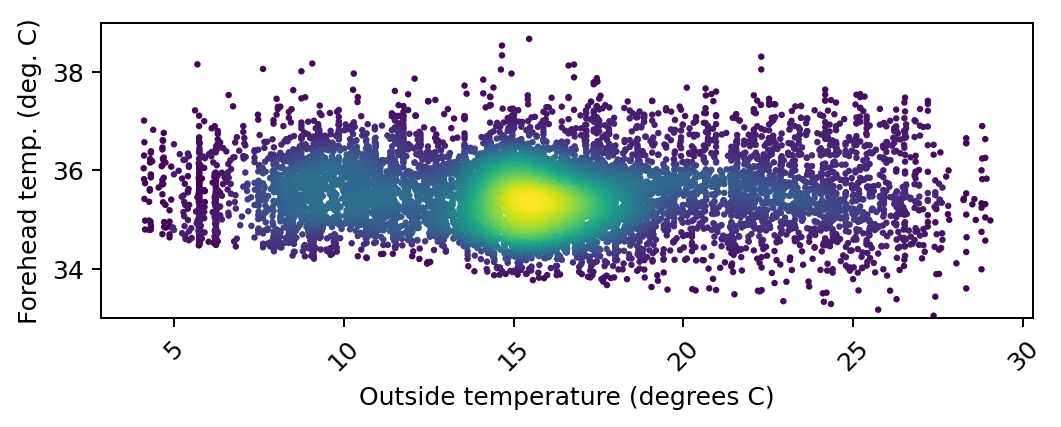

In [8]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_outside = df[df['meteo_realtemp'] > 0]
df_outside = df_outside[df_outside['machine_id'].isin([3075, 3936, 4059, 5781, 4428, 5535, 7134, 2706, 5904, 6396])]

linear_regressor = LinearRegression()
linear_regressor.fit(df_outside['meteo_realtemp'].values.reshape(-1, 1), df_outside['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_outside['meteo_realtemp'].min(), df_outside['meteo_realtemp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_outside['meteo_realtemp'].values.reshape(-1, 1), df_outside['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)


ax.set(xlabel="Outside temperature (degrees C)",
       ylabel="Forehead temp. (deg. C)")
curve = linear_regressor.predict(df_outside['meteo_realtemp'].values.reshape(-1, 1))[:,0]
density_scatter(df_outside['meteo_realtemp'], df_outside['obj_score']-curve+mean_raw,ax = ax, label='Forehead temperature')
ax.set_ylim(33,39)

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
print(len(df_outside))
#plt.title("Measurements corrected from outside temperature model")
new_df = df_outside.copy()
new_df['obj_score'] = new_df['obj_score']-curve+mean_raw
more_than_37 = df_outside['obj_score']-curve+mean_raw
print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.tight_layout()

plt.savefig('outside_forehead_corr.png')

R2 =  0.11884178020581748
18024


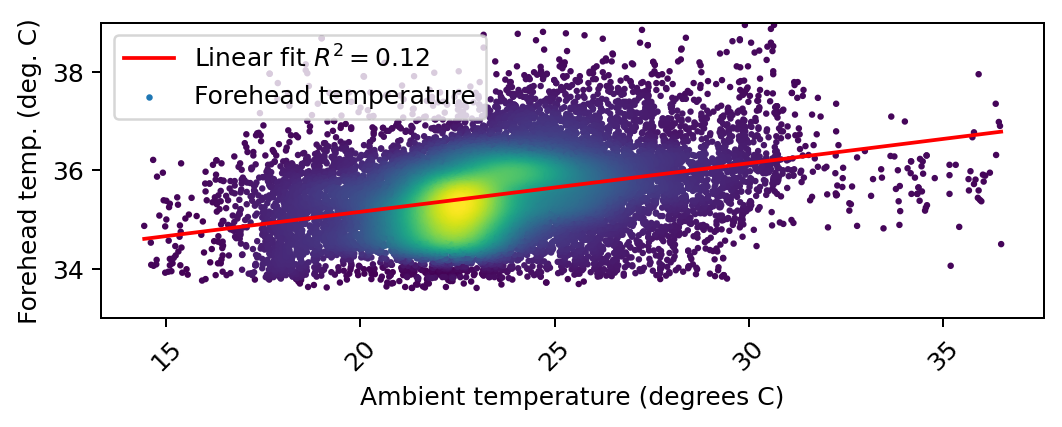

In [9]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_ambient = df[df['amb_temp'] > 0]

linear_regressor = LinearRegression()
linear_regressor.fit(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_ambient['amb_temp'].min(), df_ambient['amb_temp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)

ax.set(xlabel="Ambient temperature (degrees C)",
       ylabel="Forehead temp. (deg. C)")
ax.set_ylim(33,39)

density_scatter(df_ambient['amb_temp'], df_ambient['obj_score'],ax = ax, label='Forehead temperature')
plt.plot(X, Y_pred, 'red', label=r'Linear fit $R^2={:.2f}$'.format(score_r2))


#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
#plt.title("Effect of ambient temperature on forehead temperature")
print(len(df_ambient))
plt.tight_layout()
plt.savefig('ambient_forehead.png')

R2 =  0.11884178020581748
594


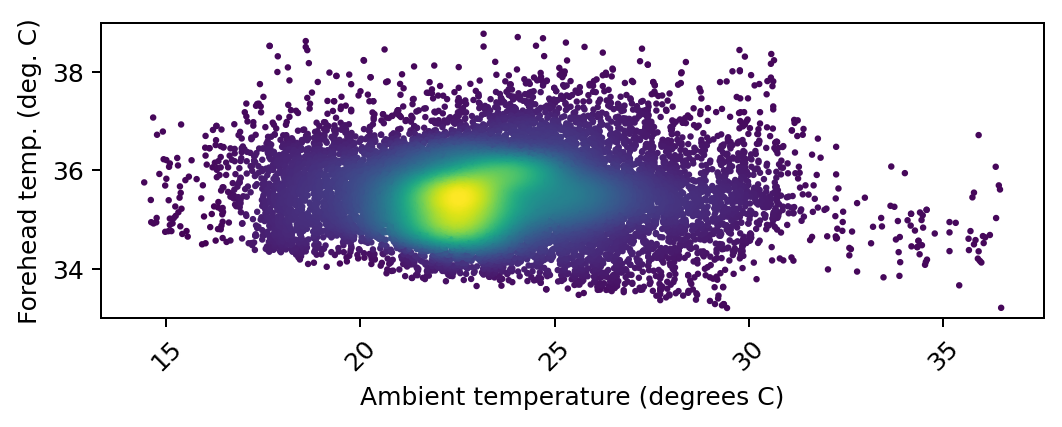

In [10]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_ambient = df[df['amb_temp'] > 0]

linear_regressor = LinearRegression()
linear_regressor.fit(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_ambient['amb_temp'].min(), df_ambient['amb_temp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)

ax.set(xlabel="Ambient temperature (degrees C)",
       ylabel="Forehead temp. (deg. C)")
curve = linear_regressor.predict(df_ambient['amb_temp'].values.reshape(-1, 1))[:,0]
ax.set_ylim(33,39)

density_scatter(df_ambient['amb_temp'], df_ambient['obj_score']-curve+mean_raw,ax = ax, label='Forehead temperature')


#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
#plt.title("Measurements corrected from ambient temperature model")
more_than_37 = df_ambient['obj_score']-curve+mean_raw
print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.tight_layout()
plt.savefig('ambient_forehead_corr.png')

R2 =  0.012563836313756127
10295
10295
339


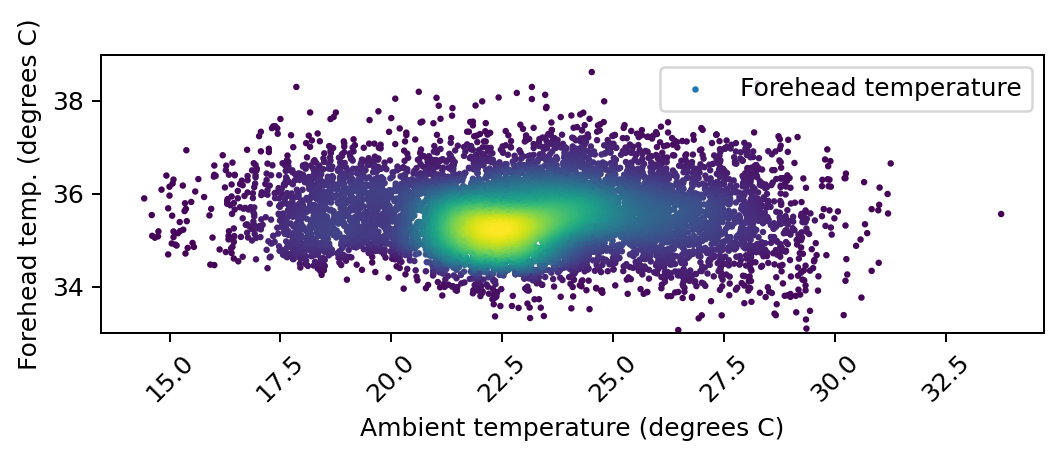

In [11]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_ambient = new_df[new_df['amb_temp'] > 0]

linear_regressor = LinearRegression()
linear_regressor.fit(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_ambient['amb_temp'].min(), df_ambient['amb_temp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)

ax.set(xlabel="Ambient temperature (degrees C)",
       ylabel="Forehead temp. (degrees C)")
curve = linear_regressor.predict(df_ambient['amb_temp'].values.reshape(-1, 1))[:,0]
ax.set_ylim(33,39)

density_scatter(df_ambient['amb_temp'], df_ambient['obj_score']-curve+mean_raw,ax=ax, label='Forehead temperature')

#plt.plot(df_ambient['amb_temp'], df_ambient['obj_score'],'.', alpha=0.1, label='Forehead temperature')
#plt.plot(X, Y_pred, 'red', label=r'Linear fit $R^2={:.2f}$'.format(score_r2))

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
#plt.title("Measurements corrected from outside + ambient models")
more_than_37 = df_ambient['obj_score']-curve+mean_raw
new_df_all = df_ambient.copy()
new_df_all['obj_score'] = new_df_all['obj_score']-curve+mean_raw
print(len(df_ambient))
print(len(new_df_all))

print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.tight_layout()

plt.savefig('foreheah_both_corr.png')

R2 =  0.18615586056206299
18024


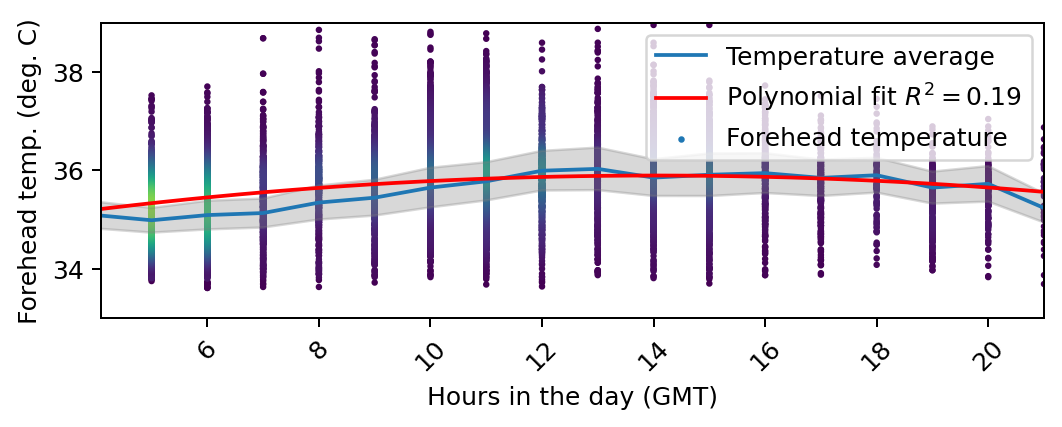

In [12]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_hours = df
df_hours['hours'] = df_hours.index.hour


linear_regressor = make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
        )
linear_regressor.fit(df_hours['hours'].values.reshape(-1, 1), df_hours['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_hours['hours'].min(), df_hours['hours'].max()).reshape(-1, 1)

Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_hours['hours'].values.reshape(-1, 1), df_hours['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)
ax.set_ylim(33,39)


ax.set(xlabel="Hours in the day (GMT)",
       ylabel="Forehead temp. (deg. C)")
by_hour = df_hours.groupby(df_hours.index.hour+2).mean()
by_hour_std = df_hours.groupby(df_hours.index.hour+2).std()


density_scatter(df_hours.index.hour, df_hours['obj_score'],ax=ax,label='Forehead temperature')
plt.plot(by_hour.index, by_hour['obj_score'],'-', alpha=1.0, label='Temperature average')
plt.fill_between(by_hour.index, by_hour['obj_score'] - by_hour_std['obj_score']/2, by_hour['obj_score'] + by_hour_std['obj_score']/2,
                 color='gray', alpha=0.3)
plt.xlim(4.1,21)
plt.plot(X, Y_pred, 'red', label=r'Polynomial fit $R^2={:.2f}$'.format(score_r2))

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
print(len(df_hours))
#plt.title("Effect of time in the day on forehead temperature")
#more_than_37 = df_outside['obj_score']

#print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.tight_layout()

plt.savefig('timeday.png')

R2 =  0.07060631991053123
10295
303
avg 35.489707057256936 std 0.667813731733434
Personal mean 0.4904227391274511, personal std 0.22552837515155646
Location A
len 3112 avg 35.64256643605587 std 0.6987085317517242
Personal mean 0.5727583487766967, personal std 0.20017904027587097
Location B
Personal mean 0.5949127820296193, personal std nan
len 1685 avg 35.377970805773124 std 0.5949127820296168
Location C
Personal mean nan, personal std nan
len 0 avg nan std nan
0


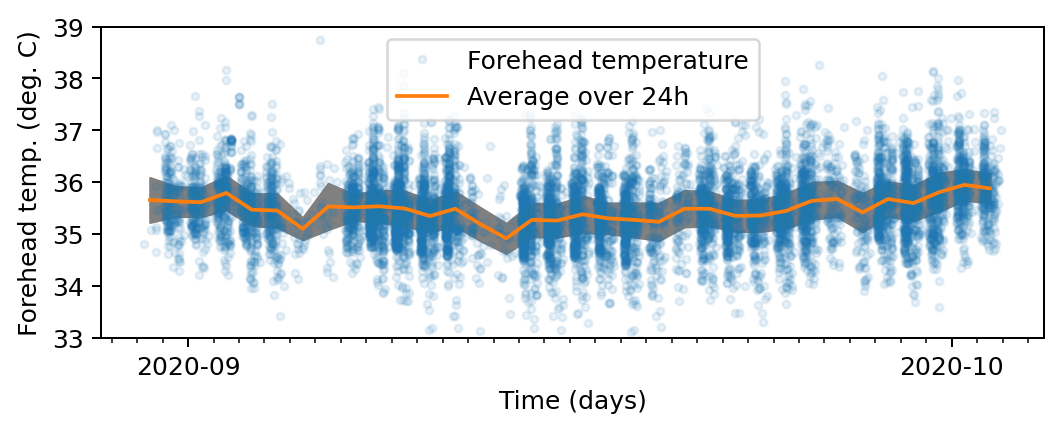

In [13]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_hours = new_df_all
df_hours['hours'] = df_hours.index.hour


linear_regressor = make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
        )
linear_regressor.fit(df_hours['hours'].values.reshape(-1, 1), df_hours['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_hours['hours'].min(), df_hours['hours'].max()).reshape(-1, 1)

Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_hours['hours'].values.reshape(-1, 1), df_hours['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)
ax.set_ylim(33,39)

curve = linear_regressor.predict(df_hours['hours'].values.reshape(-1, 1))[:,0]

by_hour = df_hours.groupby(df_hours.index.hour+2).mean()
by_hour_std = df_hours.groupby(df_hours.index.hour+2).std()

df_hours['obj_score'] = df_hours['obj_score']-curve+df_hours['obj_score'].mean()

plt.plot(df_hours['timestamp'], df_hours['obj_score'],'.', alpha=0.1, label='Forehead temperature')
df_mean = df_hours.resample('D').apply({'obj_score':'mean'})
df_std = df_hours.resample('D').apply({'obj_score':'std'})

plt.plot(df_mean.index+pd.Timedelta('0.5 day'), df_mean['obj_score'], label='Average over 24h')

plt.fill_between(df_mean.index+pd.Timedelta('0.5 day'), df_mean['obj_score'] - df_std['obj_score']/2, df_mean['obj_score'] + df_std['obj_score']/2,
                 color='gray', alpha=1.0)

# Set title and labels for axes
ax.set(       ylabel="Forehead temp. (deg. C)", xlabel="Time (days)")
frame1 = plt.gca()
frame1.axes.xaxis.set_ticks([])
#plt.plot(df_hours['amb_temp'], df_hours['obj_score']-curve+df_hours['obj_score'].mean(),'.', alpha=0.1, label='Forehead temperature')

#plt.plot(df_hours.index.hour, df_hours['obj_score'],'.', alpha=0.1, label='Forehead temperature')
#plt.plot(by_hour.index, by_hour['obj_score'],'-', alpha=1.0, label='Temperature average')
#plt.fill_between(by_hour.index, by_hour['obj_score'] - by_hour_std['obj_score']/2, by_hour['obj_score'] + by_hour_std['obj_score']/2,
#                 color='gray', alpha=0.3)
#plt.xlim(4.1,21)
#plt.plot(X, Y_pred, 'red', label=r'Polynomial fit $R^2={:.2f}$'.format(score_r2))

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
print(len(df_hours))
#plt.title("Correction from outside + ambient + seasonal models")
more_than_37 = df_hours['obj_score']
fig.subplots_adjust(bottom=0.2) 
ax.set_ylim(33,39)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month

years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(days)

plt.tight_layout()

print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.savefig('corrected_outside_ambient_seasonal.png')



print("avg {} std {}".format(df_hours['obj_score'].mean(), df_hours['obj_score'].std()))

groups = df_hours.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))


print("Location A")
df_filtered = df_hours[df_hours['machine_id'].isin([4428])]
print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))

print("Location B")
df_filtered = df_hours[df_hours['machine_id'].isin([2952, 3075, 3690, 3813, 3936, 4059, 4182, 4305])]

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))

print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))
print("Location C")
df_filtered = df_hours[df_hours['machine_id'].isin([5396])]

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))
print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))
more_than_37 = df_filtered ['obj_score']
print(len(more_than_37[more_than_37 > more_than_37.mean() + 3*more_than_37.std()]))





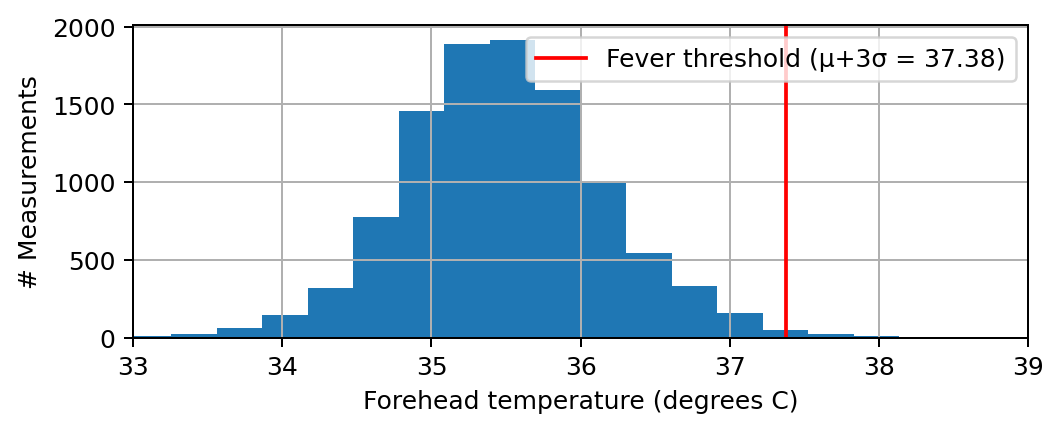

In [14]:
plt.rcParams["figure.dpi"] = 180
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_hours.hist(column=['obj_score'], bins=20, figsize=(6, 3), ax = plt.gca())
ax.set(      ylabel="# Measurements", xlabel="Forehead temperature (degrees C)")
ax.set_title("")
ax.set_xlim(33,39)
# x coordinates for the lines
xcoords = [37.38]
# colors for the lines
colors = ['r']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='Fever threshold (μ+3σ = {})'.format(xc), c=c)
fig.subplots_adjust(bottom=0.2) 
plt.legend()
plt.tight_layout()

plt.savefig('hist_corr.png')


10295
10295
Mean:  0.018656061628080308 SD: 0.5024704177579481


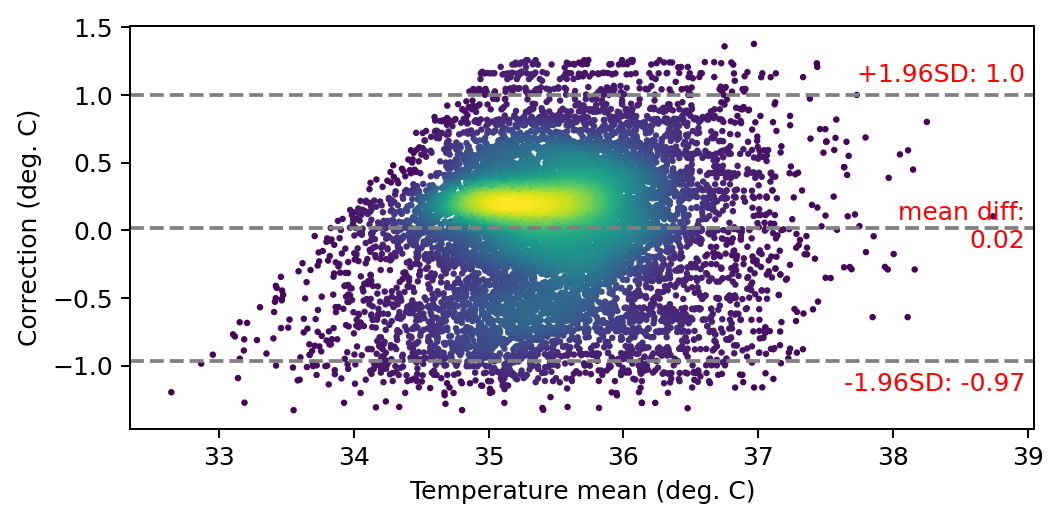

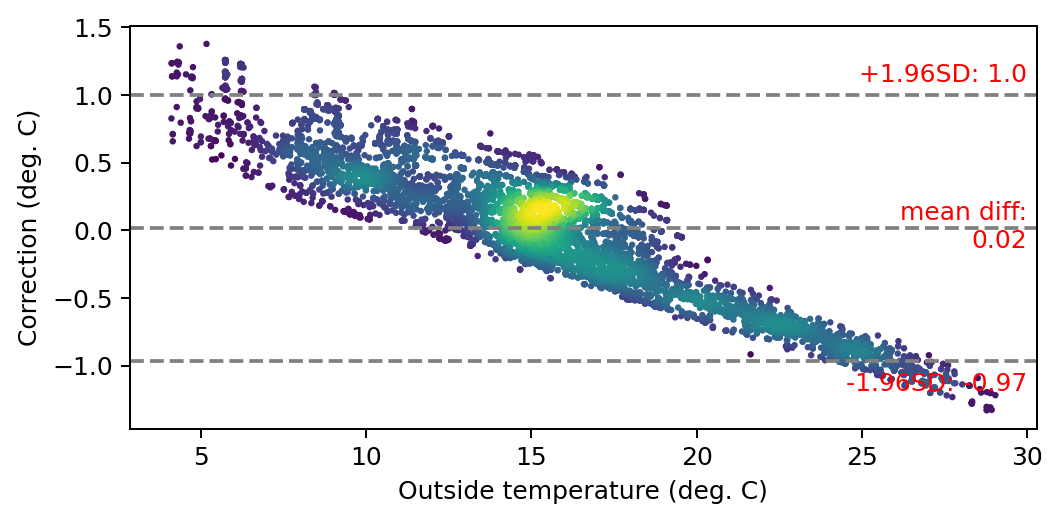

In [15]:
print(len(df_filtered_notouch))
print(len(df_hours['obj_score']))




data1     = np.asarray(df_filtered_notouch['obj_score'])
data2     = np.asarray(df_hours['obj_score'])
mean      = np.mean([data1, data2], axis=0)
diff      = -data1 + data2                   # Difference between data1 and data2
md        = np.mean(diff)                   # Mean of the difference
sd        = np.std(diff, axis=0)            # Standard deviation of the difference

print("Mean:  {} SD: {}".format(md.mean(), sd.mean()))

fig, ax = plt.subplots(figsize=(6, 3), dpi=180)

density_scatter(df_hours['obj_score'], diff, ax = ax)
plt.axhline(md,           color='gray', linestyle='--')

ax.annotate('mean diff:\n{}'.format(np.round(md, 2)),
            xy=(0.99, 0.5),
            horizontalalignment='right',
            verticalalignment='center',
            fontsize=10,
            color='red',
            xycoords='axes fraction')
    
plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

ax.annotate('-{}SD: {}'.format(1.96, np.round(md - 1.96*sd, 2)),
            xy=(0.99, 0.08),
            horizontalalignment='right',
            verticalalignment='bottom',
            fontsize=10,
            color='red',
            xycoords='axes fraction')
ax.annotate('+{}SD: {}'.format(1.96, np.round(md + 1.96*sd, 2)),
            xy=(0.99, 0.86),
            horizontalalignment='right',
            fontsize=10,
            color='red',
            xycoords='axes fraction')
        

ax.set(xlabel="Temperature mean (deg. C)",
       ylabel="Correction (deg. C)")

plt.tight_layout()
plt.savefig('bland-altman.png')



fig, ax = plt.subplots(figsize=(6, 3), dpi=180)

density_scatter(df_hours['meteo_realtemp'], diff, ax = ax)
plt.axhline(md,           color='gray', linestyle='--')

ax.annotate('mean diff:\n{}'.format(np.round(md, 2)),
            xy=(0.99, 0.5),
            horizontalalignment='right',
            verticalalignment='center',
            fontsize=10,
            color='red',
            xycoords='axes fraction')
    
plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

ax.annotate('-{}SD: {}'.format(1.96, np.round(md - 1.96*sd, 2)),
            xy=(0.99, 0.08),
            horizontalalignment='right',
            verticalalignment='bottom',
            fontsize=10,
            color='red',
            xycoords='axes fraction')
ax.annotate('+{}SD: {}'.format(1.96, np.round(md + 1.96*sd, 2)),
            xy=(0.99, 0.86),
            horizontalalignment='right',
            fontsize=10,
            color='red',
            xycoords='axes fraction')
        

ax.set(xlabel="Outside temperature (deg. C)",
       ylabel="Correction (deg. C)")

plt.tight_layout()
plt.savefig('bland-altman-outside.png')

